# Wine Quality Dataset
<hr>
Dataset retirado do repositório público da UCI: https://archive.ics.uci.edu/ml/datasets/wine+quality <br>

## Informação dos atributos

Input: <br>
1 - fixed acidity <br>
2 - volatile acidity <br>
3 - citric acid <br>
4 - residual sugar <br>
5 - chlorides <br>
6 - free sulfur dioxide <br>
7 - total sulfur dioxide <br>
8 - density <br>
9 - pH <br>
10 - sulphates <br>
11 - alcohol <br>
Output: <br>
12 - quality (score between 0 and 10) <br>


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("winequality-white.csv", sep=';')
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
774,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
3668,6.5,0.27,0.26,11.0,0.030,2.0,82.0,0.99402,3.07,0.36,11.2,5
4185,6.9,0.24,0.40,15.4,0.052,81.0,198.0,0.99860,3.20,0.69,9.4,5
3984,7.0,0.32,0.29,7.6,0.025,35.0,124.0,0.99162,3.15,0.65,12.8,7
2200,6.4,0.24,0.23,7.3,0.069,31.0,157.0,0.99620,3.25,0.53,9.1,5
636,6.2,0.17,0.28,4.7,0.037,39.0,133.0,0.99310,3.41,0.46,10.8,7
3755,7.8,0.19,0.32,7.4,0.015,47.0,124.0,0.99278,2.99,0.39,11.0,6
707,7.2,0.18,0.45,4.4,0.046,57.0,166.0,0.99430,3.13,0.62,11.2,6
3381,6.9,0.19,0.35,6.9,0.045,51.0,125.0,0.99330,3.10,0.44,10.7,7
3560,6.6,0.64,0.28,4.4,0.032,19.0,78.0,0.99036,3.11,0.62,12.9,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
df["quality"].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [5]:
df["quality"].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [7]:
correlacao = df.corr().round(4)
correlacao["quality"].sort_values(ascending = False)

quality                 1.0000
alcohol                 0.4356
pH                      0.0994
sulphates               0.0537
free sulfur dioxide     0.0082
citric acid            -0.0092
residual sugar         -0.0976
fixed acidity          -0.1137
total sulfur dioxide   -0.1747
volatile acidity       -0.1947
chlorides              -0.2099
density                -0.3071
Name: quality, dtype: float64

<AxesSubplot:title={'center':'Wine quality White'}, ylabel='Quality'>

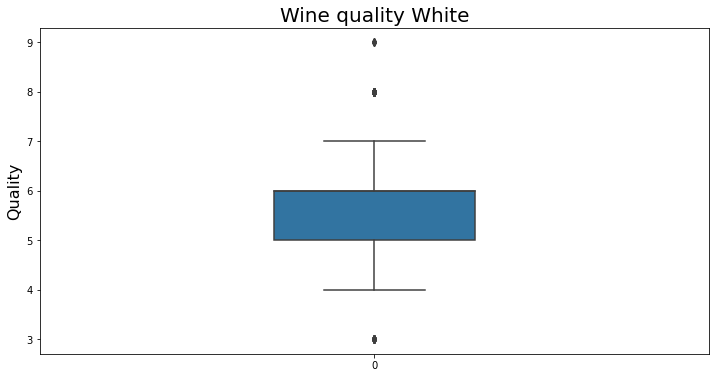

In [8]:
ax = sns.boxplot(data=df['quality'], width=0.3)
ax.figure.set_size_inches(12,6)
ax.set_title("Wine quality White", fontsize = 20)
ax.set_ylabel("Quality", fontsize=16)
ax

<AxesSubplot:title={'center':'Distribuição de Frequência'}, xlabel='quality', ylabel='Wine Quality White'>

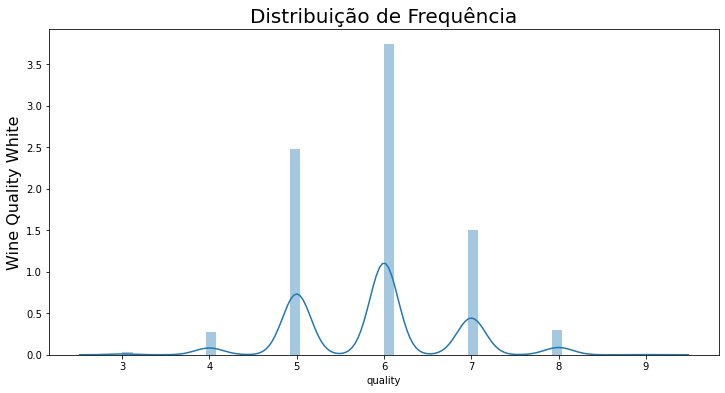

In [9]:
ax = sns.distplot(df['quality'])
ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição de Frequência", fontsize = 20)
ax.set_ylabel("Wine Quality White", fontsize=16)
ax

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

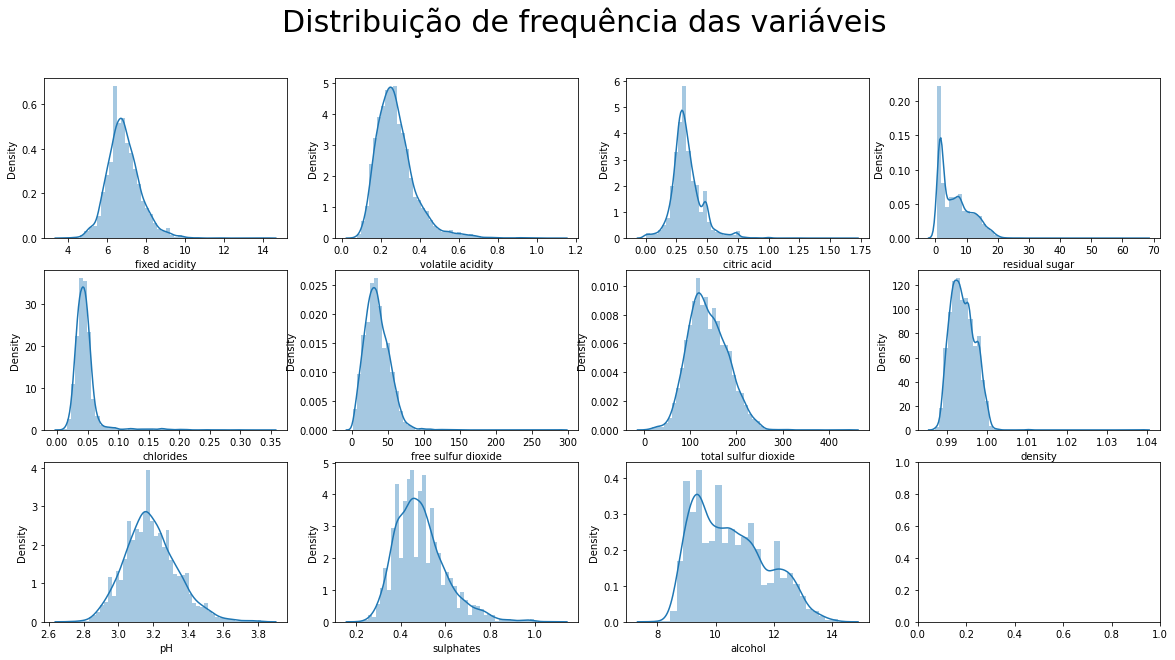

In [10]:
fig, ax = plt.subplots(3, 4, sharex=False, figsize=(20,10))
fig.suptitle("Distribuição de frequência das variáveis", fontsize=30)

sns.distplot(df['fixed acidity'], ax=ax[0, 0], kde=True)
sns.distplot(df['volatile acidity'], ax=ax[0, 1], kde=True)
sns.distplot(df['citric acid'], ax=ax[0, 2], kde=True)
sns.distplot(df['residual sugar'], ax=ax[0, 3], kde=True)
sns.distplot(df['chlorides'], ax=ax[1, 0], kde=True)
sns.distplot(df['free sulfur dioxide'], ax=ax[1, 1], kde=True)
sns.distplot(df['total sulfur dioxide'], ax=ax[1, 2], kde=True)
sns.distplot(df['density'], ax=ax[1, 3], kde=True)
sns.distplot(df['pH'], ax=ax[2, 0], kde=True)
sns.distplot(df['sulphates'], ax=ax[2, 1], kde=True)
sns.distplot(df['alcohol'], ax=ax[2, 2], kde=True)

Text(0.5, 1, 'Dispersão entre as variáveis')

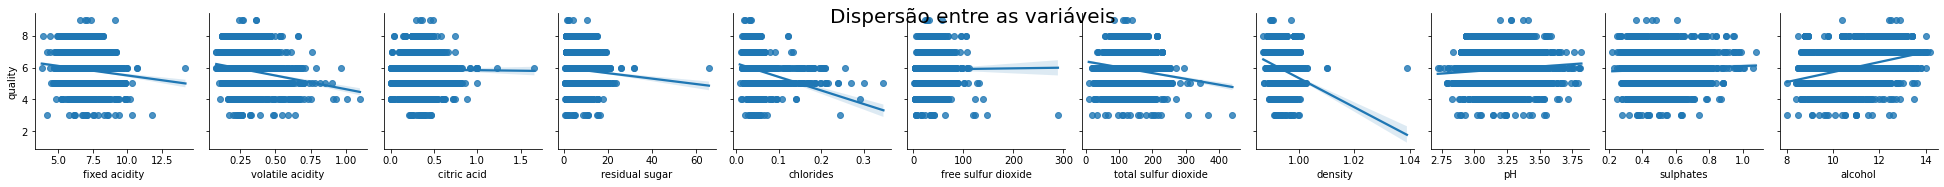

In [11]:
ax = sns.pairplot(df, y_vars = "quality", x_vars = df.columns.drop(["quality"]), kind='reg')
ax.fig.suptitle("Dispersão entre as variáveis", fontsize=20, y=1)

### A maioria das correlações não apresentam uma linearidade significante, mostrando que um algoritmo de Regressão Linear não seria adequado

## Linear Regression

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
y = df["quality"]
X = df.drop(['quality'], axis=1)

In [14]:
y.sample(5)

4204    6
2347    6
4247    6
2166    5
3124    6
Name: quality, dtype: int64

In [15]:
X.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1729,7.5,0.22,0.33,6.7,0.036,45.0,138.0,0.99390,3.20,0.68,11.4
3548,6.2,0.47,0.19,8.3,0.029,24.0,142.0,0.99200,3.22,0.45,12.3
1834,6.4,0.21,0.30,5.6,0.044,43.0,160.0,0.99490,3.60,0.41,10.6
1682,7.2,0.25,0.28,14.4,0.055,55.0,205.0,0.99860,3.12,0.38,9.0
2386,6.9,0.30,0.29,1.3,0.053,24.0,189.0,0.99362,3.29,0.54,9.9


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(X_train.shape[0] + X_test.shape[0])

(3428, 11)
(1470, 11)
4898


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [19]:
modelo = LinearRegression()

In [20]:
modelo.fit(X_train, y_train)

LinearRegression()

In [21]:
print("R² = {}".format(modelo.score(X_train, y_train).round(2)))

R² = 0.28


In [22]:
y_previsto = modelo.predict(X_test)

In [23]:
print("R² = {}".format(metrics.r2_score(y_test, y_previsto).round(2)))

R² = 0.28


#### Valor de R² muito abaixo de uma métrica razoável

## Categorização dos Dados

In [24]:
df['quality'].mean()

5.87790935075541

Categorização dos dados com base no valor médio de qualidade. <br>
Abaixo de 5: Bad <br>
Acima de 6: Good <br>
Entre 5 e 6: Normal

A primeira tentativa foi feita categorizando apenas entre Good e Bad com relação ao valor médio da qualidade, mas o desempenho foi menor do que categorizando em 3 classes.


In [25]:
'''
condition = [
    df.quality < 5.88,
    df.quality >= 5.88
]

rating = ["Bad", "Good"]
df['category'] = np.select(condition, rating)
'''
condition = [
    df.quality < 5,
    df.quality > 6
]
rating = ["Bad", "Good"]
df['category'] = np.select(condition, rating, default='Normal')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Normal
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Normal
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Normal
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Normal
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Normal


In [26]:
df['category'].value_counts()

Normal    3655
Good      1060
Bad        183
Name: category, dtype: int64

<AxesSubplot:title={'center':'Quantidade - Categoria'}, xlabel='category', ylabel='Quantidade'>

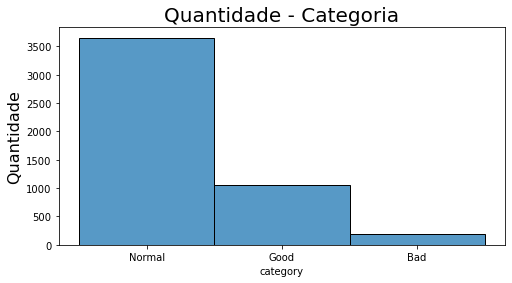

In [27]:
ax = sns.histplot(df['category'])
ax.figure.set_size_inches(8,4)
ax.set_title("Quantidade - Categoria", fontsize = 20)
ax.set_ylabel("Quantidade", fontsize=16)
ax

<AxesSubplot:xlabel='category', ylabel='alcohol'>

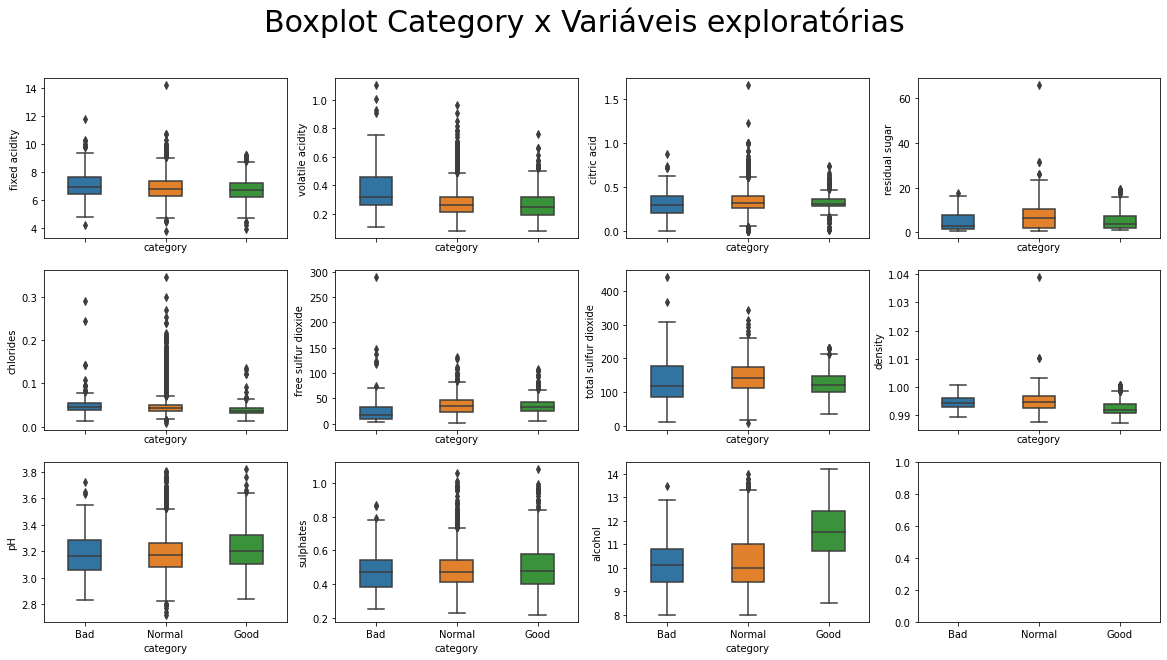

In [28]:
fig, ax = plt.subplots(3, 4, sharex=True, figsize=(20,10))
fig.suptitle("Boxplot Category x Variáveis exploratórias", fontsize=30)

sns.boxplot(x='category', y = 'fixed acidity', data=df,ax=ax[0, 0], width=0.4, order=['Bad', 'Normal', 'Good'])
sns.boxplot(x='category',y = 'volatile acidity', data=df,ax=ax[0, 1], width=0.4, order=['Bad', 'Normal', 'Good'])
sns.boxplot(x='category',y = 'citric acid', data=df,ax=ax[0, 2], width=0.4, order=['Bad', 'Normal', 'Good'])
sns.boxplot(x='category',y = 'residual sugar', data=df,ax=ax[0, 3], width=0.4, order=['Bad', 'Normal', 'Good'])
sns.boxplot(x='category',y = 'chlorides', data=df,ax=ax[1, 0], width=0.4, order=['Bad', 'Normal', 'Good'])
sns.boxplot(x='category',y = 'free sulfur dioxide', data=df,ax=ax[1, 1], width=0.4, order=['Bad', 'Normal', 'Good'])
sns.boxplot(x='category',y = 'total sulfur dioxide', data=df,ax=ax[1, 2], width=0.4, order=['Bad', 'Normal', 'Good'])
sns.boxplot(x='category',y = 'density', data=df,ax=ax[1, 3], width=0.4, order=['Bad', 'Normal', 'Good'])
sns.boxplot(x='category',y = 'pH', data=df,ax=ax[2, 0], width=0.4, order=['Bad', 'Normal', 'Good'])
sns.boxplot(x='category',y = 'sulphates', data=df,ax=ax[2, 1], width=0.4, order=['Bad', 'Normal', 'Good'])
sns.boxplot(x='category',y = 'alcohol', data=df,ax=ax[2, 2], width=0.4, order=['Bad', 'Normal', 'Good'])

In [29]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


A única variável que tem uma correlação significantemente positiva com a qualidade do vinho branco é o Alcohol. <br>
Analisando outras correlações que possam explicar a qualidade do vinho, destacam-se Alcohol x Density e Density x Residual Sugar

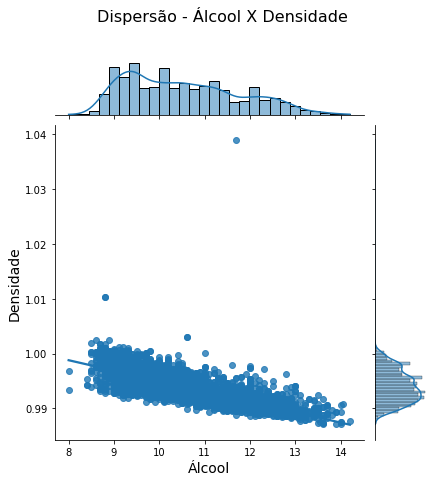

In [30]:
ax = sns.jointplot(x='alcohol', y="density", data=df, kind='reg')
ax.fig.suptitle("Dispersão - Álcool X Densidade", fontsize=16, y=1.1)
ax.set_axis_labels("Álcool", "Densidade", fontsize = 14)
ax

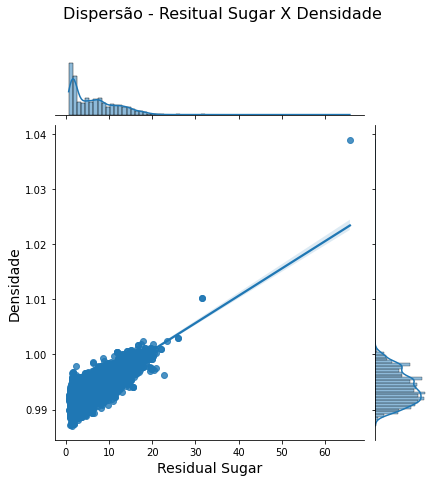

In [31]:
ax = sns.jointplot(x='residual sugar', y="density", data=df, kind='reg')
ax.fig.suptitle("Dispersão - Resitual Sugar X Densidade", fontsize=16, y=1.1)
ax.set_axis_labels("Residual Sugar", "Densidade", fontsize = 14)
ax

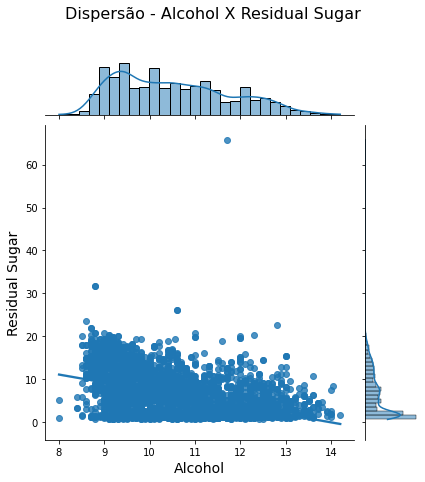

In [32]:
ax = sns.jointplot(x='alcohol', y="residual sugar", data=df, kind='reg')
ax.fig.suptitle("Dispersão - Alcohol X Residual Sugar", fontsize=16, y=1.1)
ax.set_axis_labels("Alcohol", "Residual Sugar", fontsize = 14)
ax

Os gráficos mostram que quanto maior o índice de álcool, menor a densidade do vinho tende a ser, também que vinhos com poucos índices de açúcar tendem a ser menos denso, o que também explica a última análise que mostra que vinhos com maior teor de álcool tendem a ter menos açúcar. <br>
Portanto foi constatado que essas 3 variáveis são aquelas que melhor explicam o resultado final da qualidade de um vinho branco.

## KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [48]:
features = ['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol']
#features = ['free sulfur dioxide','pH',	'sulphates',	'alcohol']
#features = ['residual sugar', 'density', 'alcohol']
#features = ['residual sugar','free sulfur dioxide','pH','density','sulphates',	'alcohol']
y = df['category']
X = df[features]

Para a análise serão utilizadas todas as variáveis do conjunto.

In [103]:
modelo = KNeighborsClassifier(3)

In [104]:
modelo.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [105]:
modelo.score(X, y)

0.866067782768477

## Avaliando o KNN utilizando Cross Validation

In [108]:
cv_scores = cross_val_score(modelo, X, y, cv=10)

In [109]:
print(cv_scores)
print("cv_scores mean {} (+/- {})".format(np.mean(cv_scores).round(4), cv_scores.std().round(4)))

[0.71020408 0.67959184 0.7122449  0.71020408 0.70408163 0.68367347
 0.67959184 0.69387755 0.66462168 0.60736196]
cv_scores mean 0.6845 (+/- 0.0299)


## Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
clf = RandomForestClassifier(random_state=0, n_estimators=100, max_depth=6, n_jobs=-1)

In [89]:
clf.fit(X, y)

RandomForestClassifier(max_depth=6, n_jobs=-1, random_state=0)

In [90]:
clf.score(X, y)

0.8209473254389547

## Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegressionCV

In [59]:
modelo_lr = LogisticRegressionCV(cv=10, random_state=0)

In [62]:
modelo_lr.fit(X, y)

LogisticRegressionCV(cv=10, random_state=0)

In [63]:
modelo_lr.score(X, y)

0.7650061249489588

## Resultados
<hr>
Foram construídos 3 modelos de predição utilizando KNN, Random Forest e Logistic Regression.
Os três tiveram um desempenho razoável, porém os que tiveram uma melhor acurácia foram os modelos de Logistic Regression e Random Forest
<br>
De modo geral foi difícil identificar as variáveis relevantes que pudessem explicar a qualidade do vinho branco, elas se mostraram muito independentes e isso pode ser constatado durante a etapa de visualização dos dados.
<br>
A categorização dos dados se mostrou uma estratégia eficaz, a princípio foram categorizados em apenas 2 tipos, porém um modelo utilizando 3 categorias se mostrou mais produtivo.